<a href="https://colab.research.google.com/github/josooik/DeepLearning/blob/main/6_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [1]:
# MNIST tensofrflow.keras
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 2. 데이터 시각화 (EDA)

In [3]:
import matplotlib.pyplot as plt

* 이미지 확인

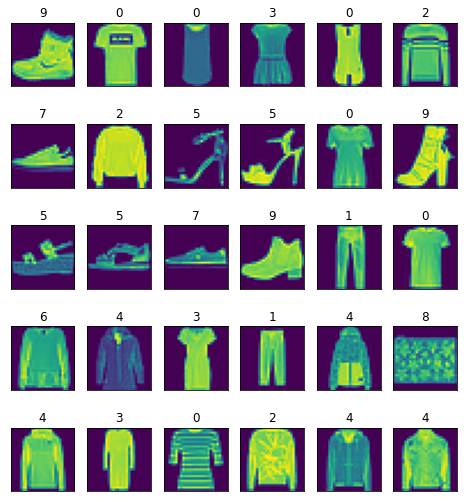

In [4]:
plt.figure(figsize=(8, 9))

for i in range(30):
  plt.subplot(5, 6, i + 1)
  img = x_train[i]
  label = y_train[i]

  plt.imshow(img)
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
  
plt.show()

* 실제 데이터 확인

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

* 데이터 시각화

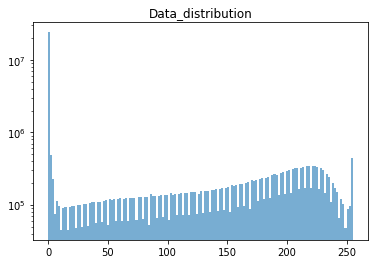

In [6]:
plt.title("Data_distribution")
plt.hist(np.reshape(x_train, (60000 * 28 * 28)), log=True, bins=150, alpha=0.6)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [7]:
def minmax(x):
  x_min = np.min(x)
  x_max = np.max(x)
  print(x_min, x_max)
  
  return (x - x_min) / (x_max - x_min)

In [8]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)

x_train_minmax.shape, x_test_minmax.shape

0 255
0 255


((60000, 28, 28), (10000, 28, 28))

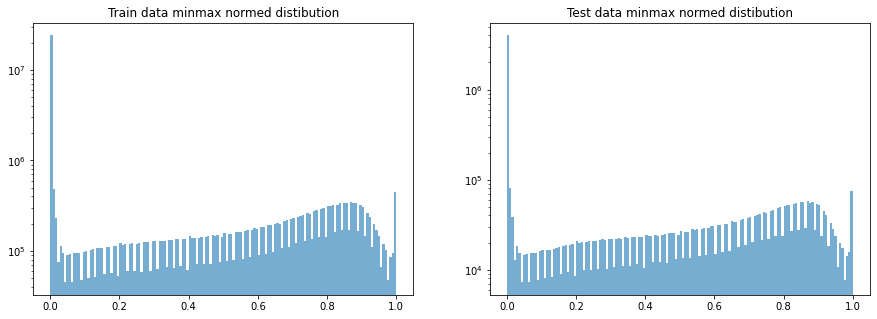

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Train data minmax normed distibution")
plt.hist(np.reshape(x_train_minmax, (60000 * 28 * 28)), log=True, bins=150, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Test data minmax normed distibution")
plt.hist(np.reshape(x_test_minmax, (10000 * 28 * 28)), log=True, bins=150, alpha=0.6)

plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [10]:
def z_score(x):
  x_mean = np.mean(x)
  x_std = np.std(x)
  print(x_mean, x_std)
  
  return (x - x_mean) / (x_std)

In [11]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)

x_train_z_score.shape, x_test_z_score.shape

72.94035223214286 90.02118235130519
73.14656658163265 89.87325907809718


((60000, 28, 28), (10000, 28, 28))

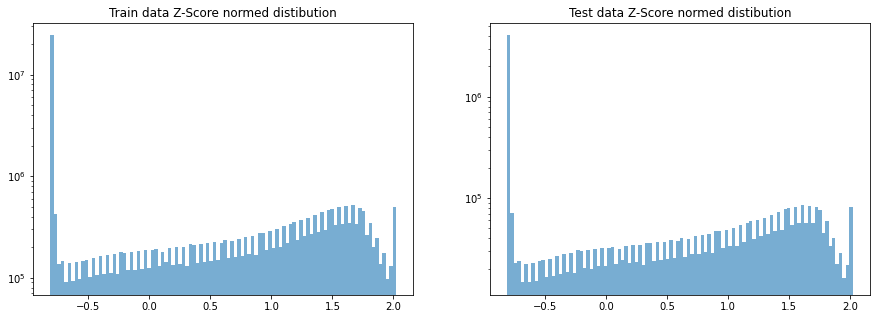

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Train data Z-Score normed distibution")
plt.hist(np.reshape(x_train_z_score, (60000 * 28 * 28)), log=True, bins=100, alpha=0.6)

plt.subplot(1, 2, 2)
plt.title("Test data Z-Score normed distibution")
plt.hist(np.reshape(x_test_z_score, (10000 * 28 * 28)), log=True, bins=100, alpha=0.6)

plt.show()

### **one-hot coding**

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

# 모델
---

## 1. 모델구현
---

In [14]:
from tensorflow.keras import models, layers, optimizers

### **Softmax regression**

In [15]:
sr = models.Sequential(name='Softmax_regression')

sr.add(layers.Flatten(input_shape=[28,28]))
sr.add(layers.Dense(10, activation='softmax'))

sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [16]:
dnn = models.Sequential(name='DNN')

# Input layer
dnn.add(layers.Flatten(input_shape=[28,28]))

# hidden layer
dnn.add(layers.Dense(128, activation='relu'))
dnn.add(layers.Dense(130, activation='relu'))

# output layer
dnn.add(layers.Dense(10, activation='softmax'))

dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 130)               16770     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1310      
Total params: 118,560
Trainable params: 118,560
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [17]:
cnn = models.Sequential(name='CNN')

# x data : (28, 28) -> 2차원
# dense : (764) -> 1차원
# convolution : (28, 28, 1) -> 3차원

# input layer
cnn.add(layers.Reshape([28, 28, 1], input_shape=[28, 28]))

# hidden layer
cnn.add(layers.Conv2D(10, kernel_size=5, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=3))
cnn.add(layers.Conv2D(10, kernel_size=5, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=3))

# output layer
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 10)          2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110     

## 2. 학습
---

### **Softmax Regression**

In [18]:
sr.compile(optimizer = optimizers.SGD(learning_rate=0.01),
           loss = 'categorical_crossentropy',
           metrics = ['acc'])

hist_sr = sr.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.8219 - acc: 0.7388
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5910 - acc: 0.8086
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5417 - acc: 0.8211
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5149 - acc: 0.8287
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - acc: 0.8324
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4852 - acc: 0.8373
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4752 - acc: 0.8399
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4677 - acc: 0.8425
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4611 - acc: 0.8439
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4558 - acc: 0.8464
Epoch 11/20
1875/1875 [======

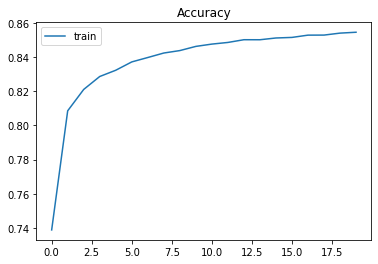

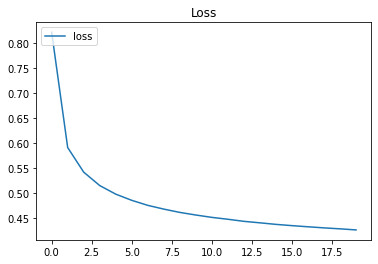

In [19]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(hist_sr.history['acc'])
#plt.plot(hist_sr.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(hist_sr.history['loss'])
#plt.plot(hist_sr.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

### **DNN**

In [20]:
dnn.compile(optimizer = optimizers.SGD(learning_rate=0.01),
           loss = 'categorical_crossentropy',
           metrics = ['acc'])

hist_dnn = dnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7425 - acc: 0.7548
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4945 - acc: 0.8278
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4450 - acc: 0.8448
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4197 - acc: 0.8521
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3999 - acc: 0.8594
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3840 - acc: 0.8650
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3711 - acc: 0.8685
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3607 - acc: 0.8715
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3503 - acc: 0.8756
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3419 - acc: 0.8776
Epoch 11/20
1875/1875 [======

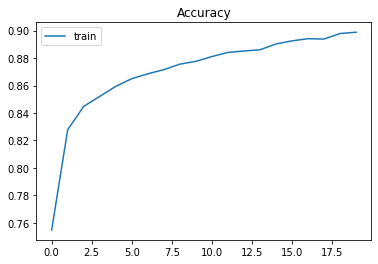

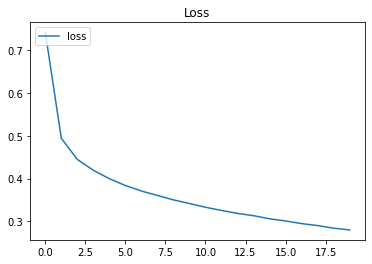

In [21]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(hist_dnn.history['acc'])
#plt.plot(hist_dnn.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(hist_dnn.history['loss'])
#plt.plot(hist_dnn.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

### CNN

In [22]:
cnn.compile(optimizer = optimizers.SGD(learning_rate=0.01),
           loss = 'categorical_crossentropy',
           metrics = ['acc'])

hist_cnn = cnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 33s 3ms/step - loss: 1.1261 - acc: 0.6037
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7176 - acc: 0.7384
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6602 - acc: 0.7584
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6211 - acc: 0.7723
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5883 - acc: 0.7835
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5639 - acc: 0.7934
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5441 - acc: 0.8012
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5260 - acc: 0.8084
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5123 - acc: 0.8133
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4994 - acc: 0.8179
Epoch 11/20
1875/1875 [=====

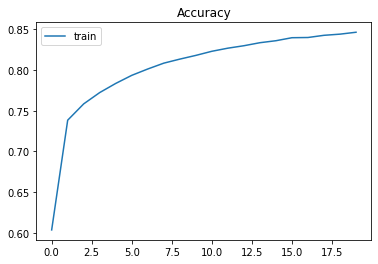

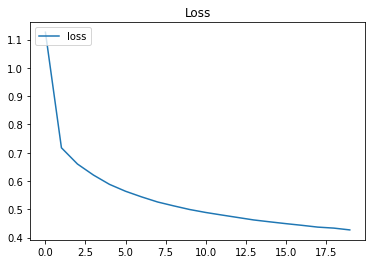

In [23]:
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(hist_cnn.history['acc'])
#plt.plot(hist_cnn.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(hist_cnn.history['loss'])
#plt.plot(hist_cnn.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()

## 3. 성능평가
---

### Softmax Regression

In [24]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

sr.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.4631 - acc: 0.8390


[0.4631233811378479, 0.8389999866485596]

### DNN

In [25]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

dnn.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.3447 - acc: 0.8779


[0.3446650803089142, 0.8779000043869019]

### CNN

In [26]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

cnn.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.4605 - acc: 0.8382


[0.4605262577533722, 0.8381999731063843]